# Phân công

| MSSV    | Tên    | Công việc                  |
|---------|--------|----------------------------|
| 1712681 | Phương | Train, display picture     |
| 1712679 | Phước  | Train                      |
| 1712594 | Minh   | Save & load model          |
| 1712695 | Quân   | Test                       |
| 1712674 | Phúc   | Train                      |
| 1712156 | Thành  | Display picture, Rescaling |

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('data/train.csv')

Y_df = df.pop('label')
X_df = df

In [3]:
X_df.head()

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,123,124,128,133,137,143,147,151,156,159,...,16,17,17,17,13,38,212,219,218,219
1,141,142,143,145,147,149,150,151,151,154,...,180,179,180,180,181,181,182,182,182,184
2,217,218,218,218,218,218,217,218,217,217,...,239,241,239,239,237,235,233,232,231,228
3,214,215,217,216,217,217,218,218,220,219,...,74,233,255,255,255,255,255,255,255,255
4,134,137,140,142,144,145,145,147,148,149,...,213,210,211,211,211,209,208,208,208,207


In [4]:
Y_df.head()

0    16
1     0
2     8
3     4
4    10
Name: label, dtype: int64

# Normalization

In [21]:
X_df = X_df/255

In [6]:
X_df

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0.482353,0.486275,0.501961,0.521569,0.537255,0.560784,0.576471,0.592157,0.611765,0.623529,...,0.062745,0.066667,0.066667,0.066667,0.050980,0.149020,0.831373,0.858824,0.854902,0.858824
1,0.552941,0.556863,0.560784,0.568627,0.576471,0.584314,0.588235,0.592157,0.592157,0.603922,...,0.705882,0.701961,0.705882,0.705882,0.709804,0.709804,0.713725,0.713725,0.713725,0.721569
2,0.850980,0.854902,0.854902,0.854902,0.854902,0.854902,0.850980,0.854902,0.850980,0.850980,...,0.937255,0.945098,0.937255,0.937255,0.929412,0.921569,0.913725,0.909804,0.905882,0.894118
3,0.839216,0.843137,0.850980,0.847059,0.850980,0.850980,0.854902,0.854902,0.862745,0.858824,...,0.290196,0.913725,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
4,0.525490,0.537255,0.549020,0.556863,0.564706,0.568627,0.568627,0.576471,0.580392,0.584314,...,0.835294,0.823529,0.827451,0.827451,0.827451,0.819608,0.815686,0.815686,0.815686,0.811765
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26995,0.729412,0.733333,0.745098,0.760784,0.772549,0.776471,0.784314,0.792157,0.800000,0.800000,...,0.768627,0.721569,0.654902,0.490196,0.792157,0.964706,0.929412,0.933333,0.933333,0.933333
26996,0.803922,0.807843,0.811765,0.807843,0.811765,0.815686,0.815686,0.811765,0.815686,0.815686,...,0.674510,0.686275,0.717647,0.729412,0.709804,0.717647,0.756863,0.674510,0.623529,0.701961
26997,0.568627,0.603922,0.623529,0.643137,0.662745,0.674510,0.686275,0.694118,0.705882,0.721569,...,0.909804,0.913725,0.921569,0.925490,0.929412,0.929412,0.933333,0.937255,0.937255,0.937255
26998,0.462745,0.478431,0.494118,0.501961,0.513725,0.517647,0.521569,0.525490,0.525490,0.525490,...,0.749020,0.792157,0.788235,0.788235,0.788235,0.792157,0.788235,0.784314,0.780392,0.780392


In [20]:
Y_df

0        16
1         0
2         8
3         4
4        10
         ..
26995    12
26996     7
26997    13
26998    23
26999     2
Name: label, Length: 27000, dtype: int64

# Split train-val

In [7]:
from sklearn.model_selection import train_test_split

X_train, X_val, Y_train, Y_val = train_test_split(X_df, Y_df, test_size=0.2, random_state=24)

print(X_train.shape, Y_train.shape, X_val.shape, Y_val.shape)

(21600, 784) (21600,) (5400, 784) (5400,)


# Display image

In [8]:
def display_image(index):
    pixels = X_train.iloc[index]
    image = [[pixels[28*i + j] for j in range(28)] for i in range(28)]
    plt.imshow(image, cmap='Greys')
    plt.colorbar()

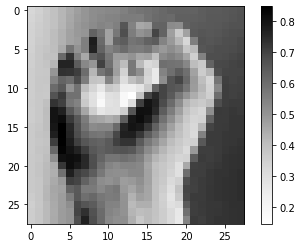

In [22]:
random_index = np.random.choice(range(len(X_train)))
display_image(random_index)

# Train

In [10]:
from sklearn.linear_model import LogisticRegression

In [11]:
clf = LogisticRegression(random_state=24, multi_class='ovr')
model = clf.fit(X_train, Y_train)

F:\anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


# Test

In [12]:
model.predict(X_train)

array([ 3,  8, 22, ..., 21, 14, 15], dtype=int64)

In [13]:
Y_train

6940      3
22383     8
19905    22
13659     2
22725    14
         ..
19857     0
24919    18
14528    21
899      14
12706    15
Name: label, Length: 21600, dtype: int64

In [25]:
from sklearn.metrics import accuracy_score

pd.DataFrame({
    "train accuracy": [accuracy_score(model.predict(X_train), Y_train)],
    "val accuracy": [accuracy_score(model.predict(X_val), Y_val)]
})

,train accuracy,val accuracy
0,0.998843,0.997963


# Save model

In [15]:
saved_file = "last_weight_logistic"

In [16]:
import pickle

pickle.dump(model, open(saved_file, 'wb+'))

# Load saved model

In [17]:
model = pickle.load(open(saved_file, 'rb'))

In [18]:
from sklearn.metrics import accuracy_score
print("train accuracy: ", accuracy_score(model.predict(X_train), Y_train))
print("val accuracy: ", accuracy_score(model.predict(X_val), Y_val))

train accuracy:  0.9988425925925926
val accuracy:  0.9979629629629629
